In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(42)

In [2]:
def generate_data(num_samples, num_features=2):
    data_size = (num_samples, num_features)
    print('data_size:{}'.format(data_size))
    train_data = np.random.randint(0, 100, size=data_size) # num_samples × num_features の配列を作る
    label_size = (num_samples, 1)
    print('label_size:{}'.format(label_size))
    labels = np.random.randint(0, 2, size=label_size)
    return train_data.astype(np.float32), labels
train_data, labels = generate_data(11)

data_size:(11, 2)
label_size:(11, 1)


In [3]:
train_data

array([[51., 92.],
       [14., 71.],
       [60., 20.],
       [82., 86.],
       [74., 74.],
       [87., 99.],
       [23.,  2.],
       [21., 52.],
       [ 1., 87.],
       [29., 37.],
       [ 1., 63.]], dtype=float32)

In [4]:
labels

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [5]:
labels.ravel() == 0

array([False,  True,  True, False, False, False,  True, False,  True,
        True,  True])

In [6]:
blue = train_data[labels.ravel() == 0]
blue

array([[14., 71.],
       [60., 20.],
       [23.,  2.],
       [ 1., 87.],
       [29., 37.],
       [ 1., 63.]], dtype=float32)

In [7]:
red = train_data[labels.ravel() == 1]
red

array([[51., 92.],
       [82., 86.],
       [74., 74.],
       [87., 99.],
       [21., 52.]], dtype=float32)

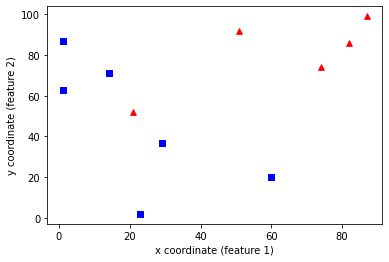

In [8]:
def plot_data(all_blue, all_red):
    plt.scatter(all_blue[:, 0], all_blue[:, 1], c='b', marker='s', s=32) # c:色, s:サイズ
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker='^', s=32)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')
    plt.show()
plot_data(blue, red)

In [9]:
# k-NN分類器のインスタンス化
knn = cv2.ml.KNearest_create()
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

In [10]:
newcomer, _ = generate_data(1)
newcomer

data_size:(1, 2)
label_size:(1, 1)


array([[58., 41.]], dtype=float32)

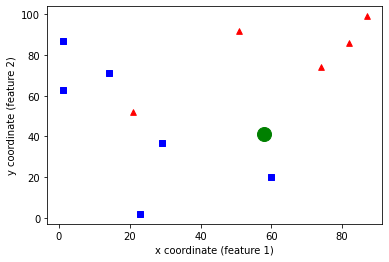

In [11]:
plt.plot(newcomer[0, 0], newcomer[0, 1], 'go', markersize=14); # ;を追加することで「[<matplotlib.lines.Line2D at 0x1bc48ea98b0>]」という出力をしない設定にすることができる
plot_data(blue, red)

In [12]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 1)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[0.]]
Neighbor's label:	 [[0.]]
Distance to neighbor:	 [[445.]]


In [13]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 7)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[1.]]
Neighbor's label:	 [[0. 0. 1. 1. 1. 1. 0.]]
Distance to neighbor:	 [[ 445.  857. 1345. 1490. 2601. 2650. 2746.]]
